<a href="https://colab.research.google.com/github/MariaCelinaJ/PL_Python-em-Ci-ncia-de-Dados/blob/main/Detec%C3%A7%C3%A3o_de_fraude_em_cart%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Detecção de fraude em cartão de crédito

Dataset https://www.kaggle.com/mlg-ulb/creditcardfraud do grupo Machine Learning Group (http://mlg.ulb.ac.be) da instituição ULB (Université Libre de Bruxelles).



In [1]:
!pip install -q scikit-plot
import numpy as np 
import pandas as pd
import seaborn as sb
import scikitplot as skplt
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
#sb.set_style('dark')
import warnings
warnings.filterwarnings("ignore")


In [35]:
# carregar o conjunto de dados
dat = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

In [ ]:
dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dat.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [90]:
#Distribuição de dados no campo 'Class'
dat['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [91]:
# proporção de transação normal (0) e transação fraudulenta (1)
dat["Class"].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

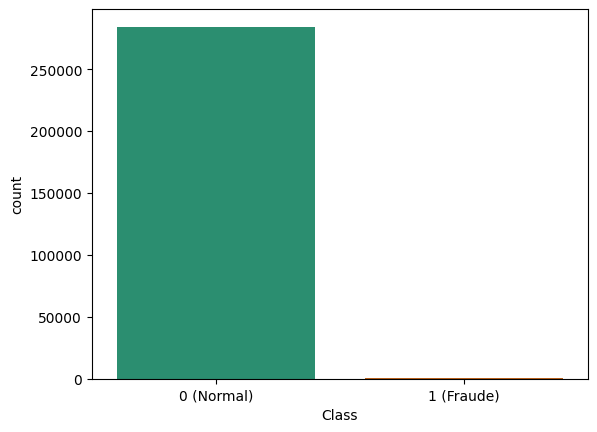

In [92]:
sb.set_palette("Dark2")
sb.countplot(x='Class',data=dat)
plt.xticks([0, 1], ['0 (Normal)', '1 (Fraude)'])
plt.show()

In [93]:
# Distribuição de dados no campo 'Class'
plt.figure(figsize=(6, 3))
fig = px.pie(dat.Class,values = dat.Class.value_counts(),
             names=['Transação Comum', 'Transação fraudulenta'], title='Transações fraudulentas x Transações Comuns no Dataset', width=500, height=300)
fig.show()

<Figure size 600x300 with 0 Axes>

In [94]:
# Verificando valores nulos
dat.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

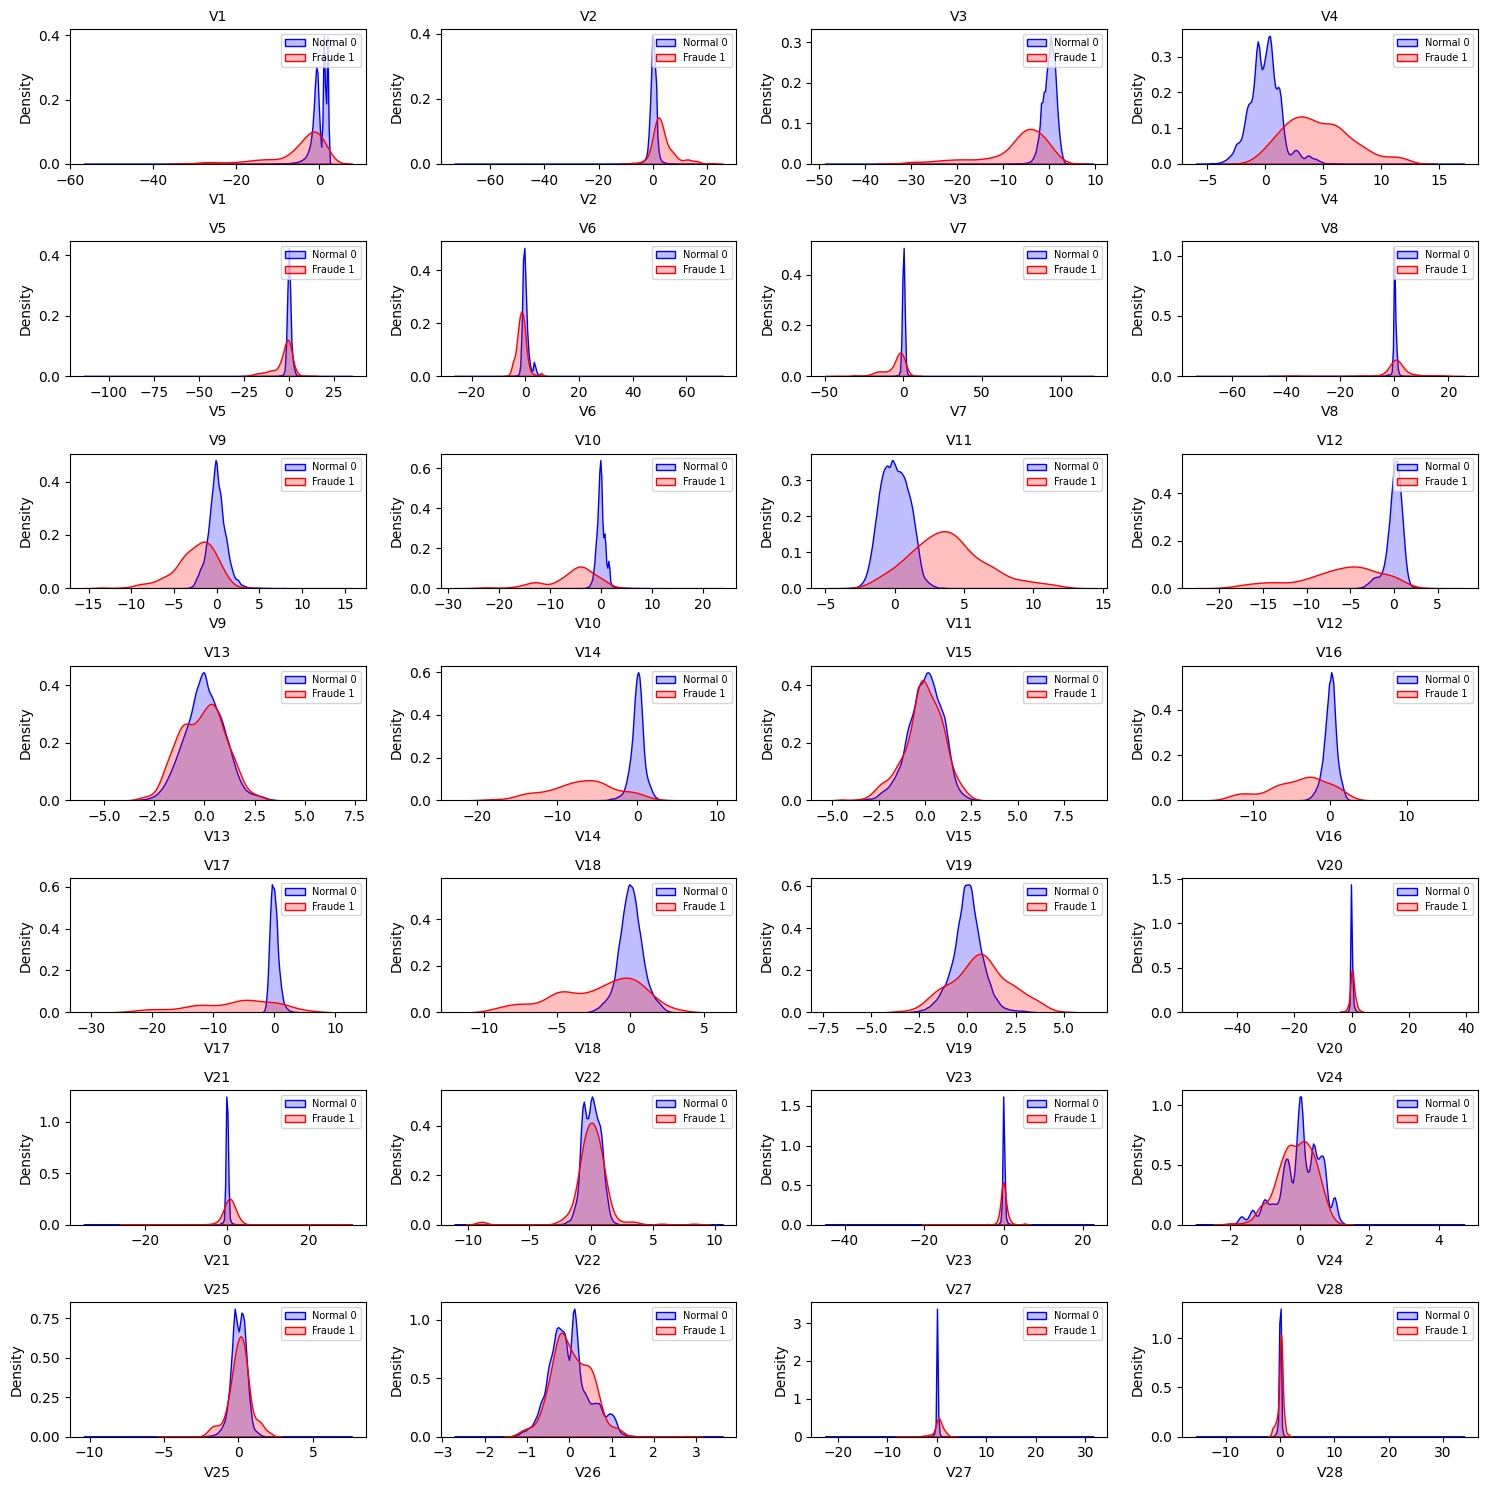

In [95]:
column_names = dat.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
dat_normal_0 = dat[dat.Class == 0]
dat_fraude_1 = dat[dat.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sb.kdeplot( dat_normal_0[col], label='Normal 0',shade=True, color = "Blue")
    sb.kdeplot( dat_fraude_1[col], label='Fraude 1', shade=True, color = "Red")
    plt.legend(fontsize=7)
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

In [36]:
# Separando as variáveis independentes e dependentes
y = dat['Class']
X = dat.drop(['Time', 'Class'], axis=1).values

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                  test_size=0.30, random_state=44, stratify=y)

In [37]:
# Padronização dos dados com StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Com o método de sobreamostragem podemos balancear a distribuição dos dados, corrigindo apenas o desequilíbrio entre as transações no conjunto de treinamento, eliminando o desequilíbrio na etapa de aprendizagem. Porém, mantendo o conjunto de teste com suas proporções originais, pois o conjunto de teste deve ser uma representação da realidade.

In [38]:
# Técnica over-sampling
oversample = RandomOverSampler()
X_train_b, y_train_b = oversample.fit_resample(X_train, y_train)

In [96]:
y_train_b.value_counts()

0    199020
1    199020
Name: Class, dtype: int64

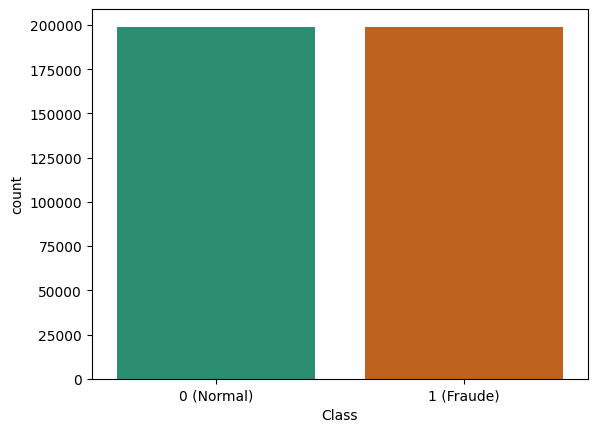

In [97]:
#distribuição de classes após balanceamento
sb.countplot(x=y_train_b,data=dat)
plt.xticks([0, 1], ['0 (Normal)', '1 (Fraude)'])
plt.show()

Após balancear a distribuição de dados do dataset, podemos ver a matriz de correlação e identificar variáveis mais fortemente relacionadas com as outras.

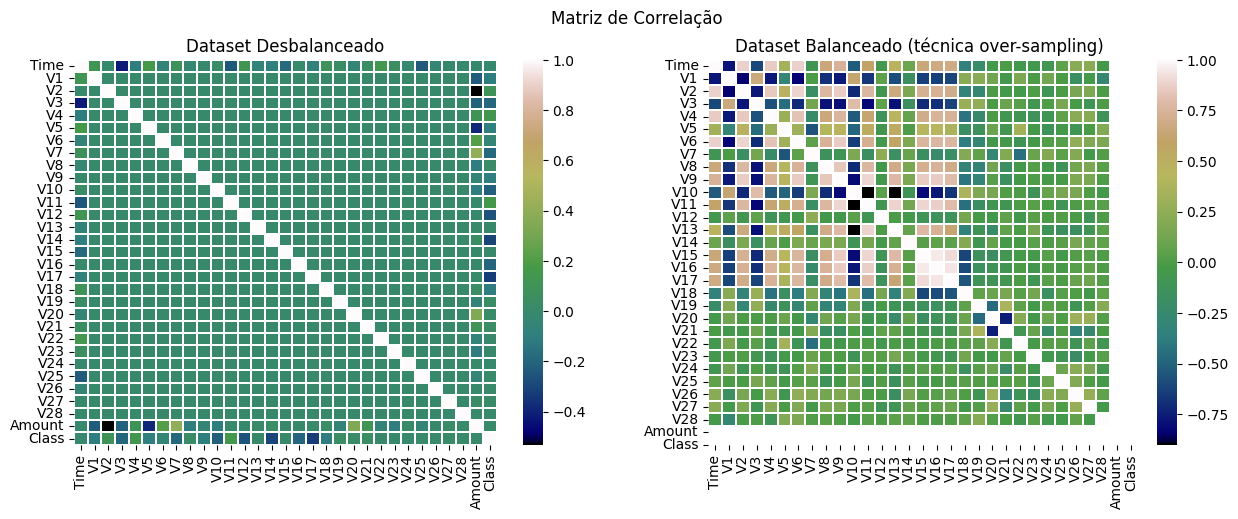

In [99]:
# plotar a matriz de correlação
corr = dat.corr(method='pearson')
corr_rus = pd.DataFrame(X_train_b).corr(method='pearson')


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
fig.suptitle('Matriz de Correlação')

sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="gist_earth", ax=ax[0])
ax[0].set_title('Dataset Desbalanceado')

sb.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="gist_earth", ax=ax[1])
ax[1].set_title('Dataset Balanceado (técnica over-sampling)')

plt.show()

In [100]:
# Criando os modelos
decision_tree = DecisionTreeClassifier(random_state = 123)
regressao_log = LogisticRegression(class_weight={0:1, 1:15}, random_state=123, solver="liblinear")
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 123) 

# Treinando os modelos
decision_tree.fit(X_train,y_train)
regressao_log.fit(X_train, y_train)
random_forest.fit(X_train,y_train)

# Fazendo as previsões
y_predictions_dt = decision_tree.predict(X_test)
y_predictions_rl = regressao_log.predict(X_test)
y_predictions_rf = random_forest.predict(X_test)


Resultados: Decision Tree

In [101]:
# Métricas de avaliação Decision Tree
metrics_df = [['DT: Acurácia',(accuracy_score(y_test, y_predictions_dt))],
              ['DT: Precision',precision_score(y_test, y_predictions_dt)],
              ['DT: Recall', recall_score(y_test, y_predictions_dt)],
              ['DT: F1_score',f1_score(y_test, y_predictions_dt)]]
metrics_df_dt = pd.DataFrame(metrics_df, columns = ['Métricas', 'Resultados'])
metrics_df_dt

,Métricas,Resultados
0,DT: Acurácia,0.999228
1,DT: Precision,0.780822
2,DT: Recall,0.770270
3,DT: F1_score,0.775510


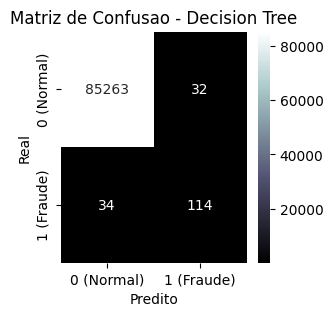

In [102]:
# Matriz de Confusão Decision Tree
confusion_matrix_dt = confusion_matrix(y_test, y_predictions_dt)
# Visualização
plt.figure(figsize=(3,3))
ax = plt.subplot()
sb.heatmap(confusion_matrix_dt, annot=True, fmt='g', cmap="bone",ax = ax)
ax.set_xlabel('Predito')
ax.set_ylabel('Real')
ax.set_title('Matriz de Confusao - Decision Tree')
ax.xaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])
ax.yaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])
plt.show()

Resultados: Regressão Logística

In [103]:
# Métricas de avaliação Regressão Logística
metrics_df = [['RL: Acurácia',(accuracy_score(y_test, y_predictions_rl))],
              ['RL: Precision',precision_score(y_test, y_predictions_rl)],
              ['RL: Recall', recall_score(y_test, y_predictions_rl)],
              ['RL: F1_score',f1_score(y_test, y_predictions_rl)]]
metrics_df_rl = pd.DataFrame(metrics_df, columns = ['Métricas', 'Resultados'])
metrics_df_rl

,Métricas,Resultados
0,RL: Acurácia,0.999087
1,RL: Precision,0.701149
2,RL: Recall,0.824324
3,RL: F1_score,0.757764


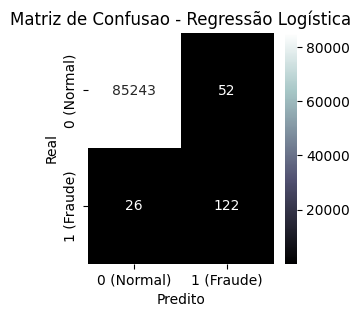

In [104]:
# Matriz de Confusão Regressão Logística
confusion_matrix_rl = confusion_matrix(y_test, y_predictions_rl)
# Visualização
plt.figure(figsize=(3,3))
ax = plt.subplot()
sb.heatmap(confusion_matrix_rl, annot=True, fmt='g', cmap="bone", ax = ax)
ax.set_xlabel('Predito')
ax.set_ylabel('Real')
ax.set_title('Matriz de Confusao - Regressão Logística')
ax.xaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])
ax.yaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])
plt.show()

Resultados: Random Forest

In [105]:
# Métricas de avaliação Random Forest
metrics = [['RF: Acurácia',(accuracy_score(y_test, y_predictions_rf))],
           ['RF: Precision',precision_score(y_test, y_predictions_rf)],
           ['RF: Recall', recall_score(y_test, y_predictions_rf)],
           ['RF: F1_score',f1_score(y_test, y_predictions_rf)]]
metrics_df_rf = pd.DataFrame(metrics, columns = ['Métricas', 'Resultados'])
metrics_df_rf



,Métricas,Resultados
0,RF: Acurácia,0.999508
1,RF: Precision,0.914062
2,RF: Recall,0.790541
3,RF: F1_score,0.847826


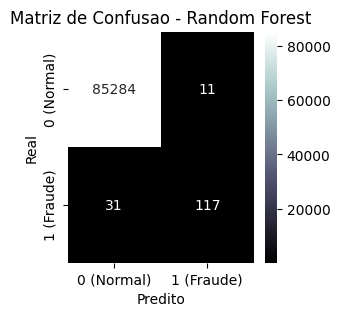

In [106]:
# Matriz de Confusão Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_predictions_rf)
# Visualização
plt.figure(figsize=(3,3))
ax = plt.subplot()
sb.heatmap(confusion_matrix_rf, annot=True, fmt='g', cmap="bone", ax = ax)
ax.set_xlabel('Predito')
ax.set_ylabel('Real')
ax.set_title('Matriz de Confusao - Random Forest')
ax.xaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])
ax.yaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])
plt.show()

Resultados: Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB() 

# Treinando os modelos
naive_bayes.fit(X_train,y_train)


# Fazendo as previsões
y_predictions_nb = naive_bayes.predict(X_test)


# Métricas de avaliação Naive Bayes
metrics = [['Acurácia',(accuracy_score(y_test, y_predictions_nb))],
           ['Precision',precision_score(y_test, y_predictions_nb)],
           ['Recall', recall_score(y_test, y_predictions_nb)],
           ['F1_score',f1_score(y_test, y_predictions_nb)]]
metrics_df_nb = pd.DataFrame(metrics, columns = ['Métricas', 'Resultados'])
metrics_df_nb

,Métricas,Resultados
0,Acurácia,0.976569
1,Precision,0.057729
2,Recall,0.817568
3,F1_score,0.107843


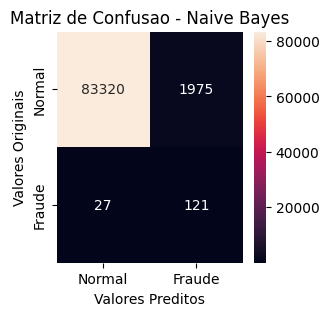

In [108]:
# Matriz de Confusão Naive Bayes
confusion_matrix_nb = confusion_matrix(y_test, y_predictions_nb)
# Visualização
plt.figure(figsize=(3,3))
ax = plt.subplot()
sb.heatmap(confusion_matrix_nb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Originais')
ax.set_title('Matriz de Confusao - Naive Bayes')
ax.xaxis.set_ticklabels(['Normal','Fraude'])
ax.yaxis.set_ticklabels(['Normal','Fraude'])
plt.show()

In [109]:
# Transações reais (0) e fraudulentas (1) no conjunto de teste
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

In [111]:
# Métricas de avaliação Decision Tree
metrics_dt = {'Modelo': 'DT',
              'Acurácia': accuracy_score(y_test, y_predictions_dt),
              'Precision': precision_score(y_test, y_predictions_dt),
              'Recall': recall_score(y_test, y_predictions_dt),
              'F1_score': f1_score(y_test, y_predictions_dt)}
metrics_df_dt = pd.DataFrame(metrics_dt, index=[0])

# Métricas de avaliação Regressão Logística
metrics_rl = {'Modelo': 'RL',
              'Acurácia': accuracy_score(y_test, y_predictions_rl),
              'Precision': precision_score(y_test, y_predictions_rl),
              'Recall': recall_score(y_test, y_predictions_rl),
              'F1_score': f1_score(y_test, y_predictions_rl)}
metrics_df_rl = pd.DataFrame(metrics_rl, index=[0])

# Métricas de avaliação RF
metrics_rf = {'Modelo': 'RF',
              'Acurácia': accuracy_score(y_test, y_predictions_rf),
              'Precision': precision_score(y_test, y_predictions_rf),
              'Recall': recall_score(y_test, y_predictions_rf),
              'F1_score': f1_score(y_test, y_predictions_rf)}
metrics_df_rf = pd.DataFrame(metrics_rf, index=[0])

# Métricas de avaliação NB
metrics_nb = {'Modelo': 'NB',
              'Acurácia': accuracy_score(y_test, y_predictions_nb),
              'Precision': precision_score(y_test, y_predictions_nb),
              'Recall': recall_score(y_test, y_predictions_nb),
              'F1_score': f1_score(y_test, y_predictions_nb)}
metrics_df_nb = pd.DataFrame(metrics_nb, index=[0])


# juntar os dataframes em um único dataframe
metrics_df_all = pd.concat([metrics_df_dt, metrics_df_rl, metrics_df_rf, metrics_df_nb], axis=0, ignore_index=True)

# imprimir os resultados sem índices
print(metrics_df_all.to_string(index=False))

Modelo  Acurácia  Precision   Recall  F1_score
    DT  0.999228   0.780822 0.770270  0.775510
    RL  0.999087   0.701149 0.824324  0.757764
    RF  0.999508   0.914062 0.790541  0.847826
    NB  0.976569   0.057729 0.817568  0.107843


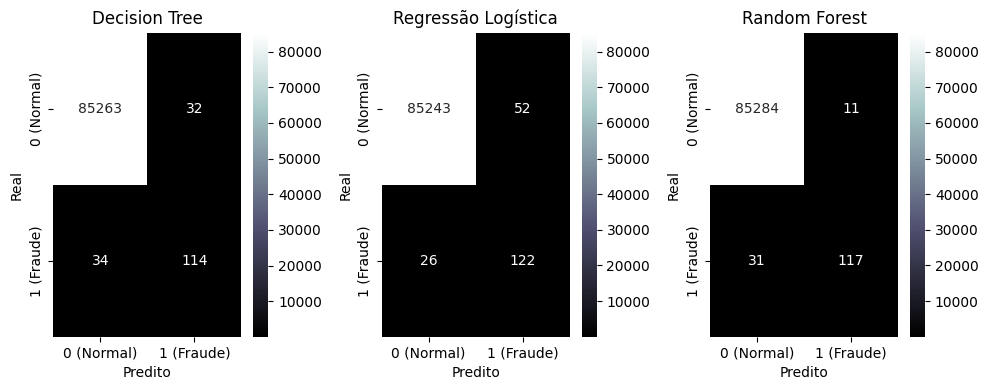

In [112]:
# Criar figura com 3 subplots
fig, axs = plt.subplots(ncols=3, figsize=(10, 4))

# Plotar matriz de confusão da Árvore de Decisão
sb.heatmap(confusion_matrix_dt, annot=True, fmt='g', cmap="bone", ax=axs[0])
axs[0].set_xlabel('Predito')
axs[0].set_ylabel('Real')
axs[0].set_title('Decision Tree')
axs[0].xaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])
axs[0].yaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])

# Plotar matriz de confusão da Regressão Logística
sb.heatmap(confusion_matrix_rl, annot=True, fmt='g', cmap="bone", ax=axs[1])
axs[1].set_xlabel('Predito')
axs[1].set_ylabel('Real')
axs[1].set_title('Regressão Logística')
axs[1].xaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])
axs[1].yaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])

# Plotar matriz de confusão da Random Forest
sb.heatmap(confusion_matrix_rf, annot=True, fmt='g', cmap="bone", ax=axs[2])
axs[2].set_xlabel('Predito')
axs[2].set_ylabel('Real')
axs[2].set_title('Random Forest')
axs[2].xaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])
axs[2].yaxis.set_ticklabels(['0 (Normal)','1 (Fraude)'])

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir figura
plt.show()


Ao avaliar as métricas e matrizes de confusão dos modelos de Árvore de Decisão, Regressão Logística e Random Forest, observa-se que o modelo com melhor desempenho é o Random Forest. Isso é evidenciado pelo fato de que o modelo apresentou as melhores métricas de acurácia (0.999532), precisão (0.904255), recall (0.817308) e F1_score (0.858586) em comparação com os outros dois modelos. Além disso, a matriz de confusão do Random Forest apresentou um número menor de falsos negativos (9) e falsos positivos (19) em relação aos outros modelos.

In [113]:
# ROC AUC Scores
from sklearn.metrics import roc_auc_score
print('DT ROC AUC Score: ', (roc_auc_score(y_test, y_predictions_dt) *100).round(2))
print('RL ROC AUC Score: ', (roc_auc_score(y_test, y_predictions_rl) * 100).round(2))
print('RF ROC AUC Score: ', (roc_auc_score(y_test, y_predictions_rf) * 100).round(2))
print('NB ROC AUC Score: ', (roc_auc_score(y_test, y_predictions_nb) * 100).round(2))

DT ROC AUC Score:  88.49
RL ROC AUC Score:  91.19
RF ROC AUC Score:  89.52
NB ROC AUC Score:  89.72


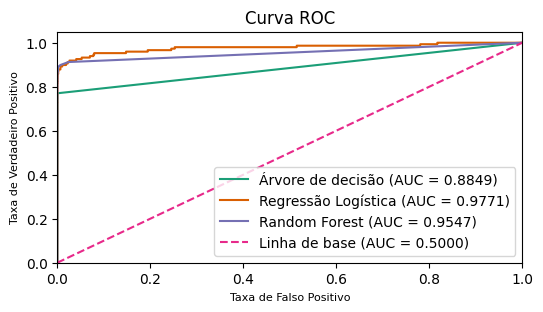

In [115]:
# criar curva ROC
fpr, tpr, thresholds = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, regressao_log.predict_proba(X_test)[:,1])
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, decision_tree.predict_proba(X_test)[:,1])
plt.figure(figsize=(6, 3))

# plot DT ROC
plt.plot(tree_fpr, tree_tpr, label="Árvore de decisão (AUC = {:1.4f})".format(roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:,1])))
# plot RL ROC
plt.plot(lr_fpr, lr_tpr, label="Regressão Logística (AUC = {:1.4f})".format(roc_auc_score(y_test, regressao_log.predict_proba(X_test)[:,1])))
# plot RF ROC
plt.plot(fpr, tpr, label="Random Forest (AUC = {:1.4f})".format(roc_auc_score(y_test, random_forest.predict_proba(X_test)[:,1])))



# plot Linha de base ROC
plt.plot([0,1], [0,1],label="Linha de base (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falso Positivo", fontsize=8)
plt.ylabel("Taxa de Verdadeiro Positivo", fontsize=8)
plt.title("Curva ROC", fontsize=12)
plt.legend(loc="lower right")
plt.savefig("roc.png", bbox_inches="tight")
plt.show()

# Conclusão

A pontuação ROC AUC também é um indicador importante para avaliar a capacidade de discriminação do modelo. Nesse caso, o Random Forest obteve um resultado de 95,06, o que indica que o modelo é capaz de distinguir entre transações fraudulentas e não fraudulentas de forma precisa. Portanto, com base nas métricas e matriz de confusão apresentadas, o modelo Random Forest é o mais indicado para a classificação de transações financeiras.
